<h1 align="center"> Evaluación de créditos financieros


---

#Introducción

Entidades acreedoras de créditos utilizan la calificación crediticia (del inglés, credit score) para
evaluar la solvencia de las personas que solicitan préstamos al momentos de pagar la deuda que este
conlleva. Luego, en el caso particular de los bancos, esta métrica se utiliza para decidir si aprobar un
crédito a un individuo o no.

En este trabajo, trataremos de construir un modelo que pueda determinar de forma automática si
una persona natural tiene una calificación crediticia aceptable o insuficiente para un determinado
crédito, representándolo como un problema de clasificación binario.

Para ello, contamos con un dataset que tiene 28.921 registros sobre evaluaciones de créditos, y 24
variables con información sobre el individuo, su comportamiento en torno a la solicitud de créditos,
pago de deudas, y una etiqueta que nos indica si la evaluación sobre este es buena o mala.


# EDA y Feature Engineering

## Librerias

Lo primero que se debe hacer es importar las librerias necesarias para poder realizar el EDA:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

## Datos

Importamos los datos y los visualizamos para examinar sus atributos y comprender su significado:

In [ ]:
datos = pd.read_csv('/content/credits.csv') #cargar archivo csv con el nombre "credits.csv"
datos.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,7.0,11.27,4.0,809.98,26.822620,No,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,8.0,11.27,4.0,809.98,22.537593,No,178.344067,Low_spent_Small_value_payments,244.565317,1
2,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,1.0,7.42,2.0,605.03,38.550848,No,40.391238,High_spent_Large_value_payments,484.591214,1
3,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,1.0,6.42,2.0,605.03,34.977895,No,130.115420,Low_spent_Small_value_payments,444.867032,1
4,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,0.0,5.42,2.0,605.03,33.381010,No,43.477190,High_spent_Large_value_payments,481.505262,1


| ID |     Variable               | Descripción                                                                                     |
|----|---------------------------|------------------------------------------------------------------------------------------------|
| 1  | ID                        | Identificador de la fila.                                                                     |
| 2  | Customer_ID               | ID del Cliente.                                                                                |
| 3  | Month                     | Mes del registro.                                                                              |
| 4  | Name                      | Nombre de la persona.                                                                          |
| 5  | Age                       | Edad.                                                                                          |
| 6  | SSN                       | SSN (Número de Seguro Social).                                                                |
| 7  | Occupation                | Ocupación.                                                                                     |
| 8  | Annual_Income             | Ingreso Anual.                                                                                 |
| 9  | Monthly_Inhand_Salary     | Salario mensual neto.                                                                          |
| 10 | Num_Bank_Accounts         | Número de cuentas bancarias.                                                                   |
| 11 | Num_Credit_Card           | Número de tarjetas de crédito.                                                                 |
| 12 | Interest_Rate             | Tasa de Interés en tarjetas de crédito.                                                        |
| 13 | Num_of_Loan               | Número de préstamos tomados en el banco.                                                       |
| 14 | Delay_from_due_date       | Promedio de días de demora de pago.                                                            |
| 15 | Num_of_Delayed_Payment    | Promedio de pagos atrasados.                                                                   |
| 16 | Changed_Credit_Limit      | Porcentaje del cambio porcentual en el límite de la tarjeta de crédito.                         |
| 17 | Num_Credit_Inquiries      | Número de solicitudes de créditos.                                                             |
| 18 | Outstanding_Debt           | Deuda Pendiente.                                                                               |
| 19 | Credit_Utilization_Ratio  | Ratio de utilización de la tarjeta de crédito.                                                  |
| 20 | Payment_of_Min_Amount     | Si pagó el monto mínimo de la deuda del crédito.                                               |
| 21 | Amount_invested_monthly   | Monto Invertido Mensualmente.                                                                  |
| 22 | Payment_Behaviour         | Comportamiento de pago del cliente.                                                            |
| 23 | Monthly_Balance           | Saldo Mensual del cliente.                                                                     |
| 24 | Credit_Score(y)           | Puntuación de Crédito, 1 si es buena, 0 si es mala.                                             |


Después de revisar los datos, se identificó la presencia de duplicados, lo cual motivó la necesidad de verificar la cantidad de filas duplicadas en los datos:

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28921 entries, 0 to 28920
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        28921 non-null  object 
 1   Customer_ID               28921 non-null  object 
 2   Month                     28921 non-null  object 
 3   Name                      28921 non-null  object 
 4   Age                       28921 non-null  int64  
 5   SSN                       28921 non-null  object 
 6   Occupation                28921 non-null  object 
 7   Annual_Income             28921 non-null  float64
 8   Monthly_Inhand_Salary     28921 non-null  float64
 9   Num_Bank_Accounts         28921 non-null  int64  
 10  Num_Credit_Card           28921 non-null  int64  
 11  Interest_Rate             28921 non-null  int64  
 12  Num_of_Loan               28921 non-null  int64  
 13  Delay_from_due_date       28921 non-null  int64  
 14  Num_of

In [ ]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,28921.0,2.813461e+01,5.246706e+01,-5.000000e+02,24.000000,33.000000,41.000000,9.900000e+01
Annual_Income,28921.0,1.680772e+05,1.402458e+06,7.005930e+03,18743.075000,37302.100000,70137.800000,2.419806e+07
Monthly_Inhand_Salary,28921.0,4.101377e+03,3.217514e+03,3.195562e+02,1567.786667,3050.206667,5721.726667,1.516718e+04
Num_Bank_Accounts,28921.0,1.662211e+01,1.151760e+02,-1.000000e+00,3.000000,6.000000,8.000000,1.794000e+03
Num_Credit_Card,28921.0,2.309616e+01,1.308263e+02,0.000000e+00,4.000000,6.000000,7.000000,1.499000e+03
Interest_Rate,28921.0,7.739656e+01,4.834105e+02,1.000000e+00,7.000000,15.000000,24.000000,5.788000e+03
Num_of_Loan,28921.0,-1.321877e-01,2.049165e+01,-1.000000e+02,2.000000,3.000000,6.000000,2.280000e+02
Delay_from_due_date,28921.0,2.259669e+01,1.661642e+01,-5.000000e+00,10.000000,18.000000,31.000000,6.700000e+01
Num_of_Delayed_Payment,28921.0,3.150444e+01,2.310557e+02,-3.000000e+00,8.000000,14.000000,19.000000,4.360000e+03
Changed_Credit_Limit,28921.0,9.518030e+00,6.641977e+00,-6.480000e+00,4.550000,8.530000,13.040000,3.582000e+01


#### Verificación de instancias nulas y duplicadas

In [ ]:
instancias_duplicadas = datos[datos.duplicated()]  #ve las filas duplicadas y las guarda en la variable instancias_duplicadas
display(instancias_duplicadas)   #muestra las filas que están duplicadas

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = datos.isna().sum()
print(valores_nulos)

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = datos.isnull().sum()
print(valores_nulos)

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


No existen instancias nulas, ni duplicadas en los datos.


#### Valores únicos en cada columna

In [ ]:
for column in datos.columns:
    unique_values = datos[column].unique()
    print(f"Valores únicos de la columna '{column}':")
    print(unique_values)
    print()

Valores únicos de la columna 'ID':
['0x1602' '0x1608' '0x160f' ... '0x255d3' '0x255de' '0x255e2']

Valores únicos de la columna 'Customer_ID':
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xa568' 'CUS_0x701f'
 'CUS_0xb80d']

Valores únicos de la columna 'Month':
['January' 'July' 'February' 'May' 'June' 'August' 'April' 'March']

Valores únicos de la columna 'Name':
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 't Pascalei' 'Kazunorig'
 'Alex Frewt']

Valores únicos de la columna 'Age':
[  23   28   34   31   33   30   24   44   45   39   20   26   32   41
   42   37   38   54   55   43   36   16   21   22   19   27   14   46
   17   18   47   35   15   25 -500   53   29   48   51   49   50   40
   52   56   99]

Valores únicos de la columna 'SSN':
['821-00-0265' '004-07-5839' '486-85-3974' ... '520-28-2763' '549-24-1350'
 '713-24-3856']

Valores únicos de la columna 'Occupation':
['Scientist' 'Teacher' '_______' 'Engineer' 'Lawyer' 'Media_Manager'
 'Doctor' 'Journalist' 'Manager'

A continuación se muestran los analisis realizados para los valores anormales encontrados en la parte anterior.

Outliers de la columna número de solicitudes de credito

Text(0.5, 9.444444444444438, 'Num_Credit_Inquiries')

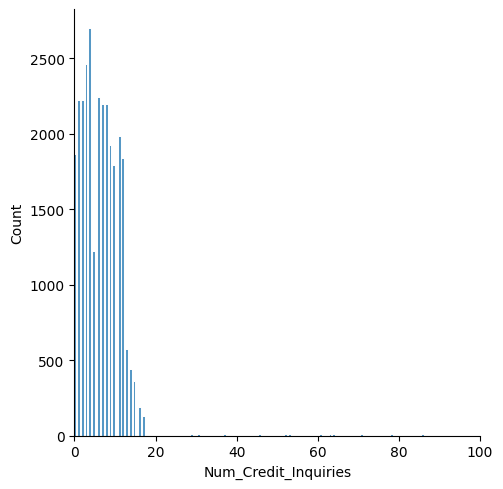

In [ ]:
sns.displot(datos['Num_Credit_Inquiries'])
plt.xlim([0, 100]);
plt.xlabel('Num_Credit_Inquiries')

In [ ]:
len(datos[datos['Num_Credit_Inquiries'] >20])

474

<Axes: xlabel='Credit_Score', ylabel='Count'>

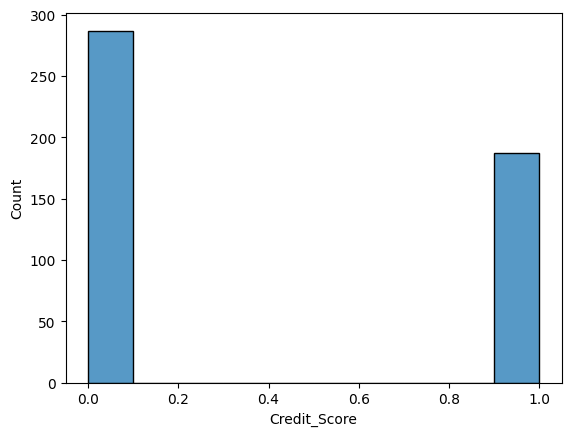

In [ ]:
# Filtrar las instancias con Interest_Rate mayor a 40 y mostrar los valores de Credit_Score
credit_score_solicitud_mayor_20 = datos.loc[datos['Num_Credit_Inquiries'] > 20, 'Credit_Score']

# Imprimir los valores de Credit_Score
sns.histplot(credit_score_solicitud_mayor_20)

Text(0.5, 9.444444444444438, 'Interest_Rate')

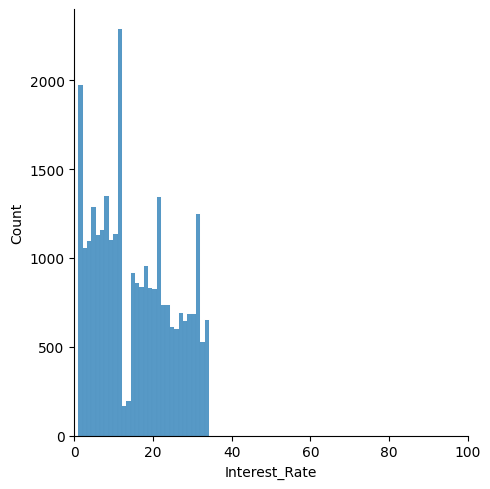

In [ ]:
sns.displot(datos['Interest_Rate'])
plt.xlim([0, 100]);
plt.xlabel('Interest_Rate')

Outliers columna interes de tarjetas de crédito

<Axes: xlabel='Credit_Score', ylabel='Count'>

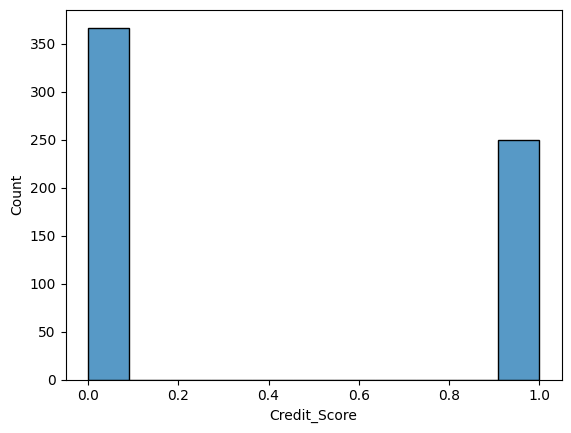

In [ ]:
# Filtrar las instancias con Interest_Rate mayor a 40 y mostrar los valores de Credit_Score
credit_score_interes_mayor_40 = datos.loc[datos['Interest_Rate'] > 40, 'Credit_Score']

# Imprimir los valores de Credit_Score
sns.histplot(credit_score_interes_mayor_40)

Outliers de columna número de tarjetas de credito

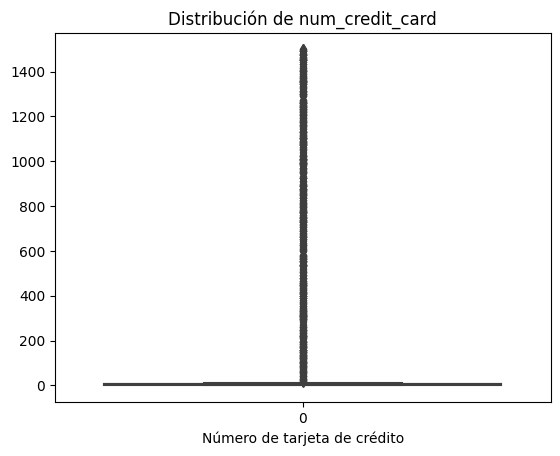

In [ ]:
import seaborn as sns
# Graficar la distribución de la columna 'num_credit_card'
sns.boxplot(datos['Num_Credit_Card'])

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de num_credit_card')
plt.xlabel('Número de tarjeta de crédito')
# Mostrar el gráfico
plt.show()

In [ ]:
print("La cantidad de valores -500 en la columna 'AGE' es:", len(datos[datos['Age'] == -500]))
print("La cantidad de valores < 0 en la columna 'Num_Bank_Accounts' es:", len(datos[datos['Num_Bank_Accounts'] < 0]))
print("La cantidad de valores  !@9#%8 en la columna 'Payment_Behaviour' es:", len(datos[datos['Payment_Behaviour'] == '!@9#%8']))
print("La cantidad de valores < 0 en la columna 'Num_of_Delayed_Payment' es:", len(datos[datos['Num_of_Delayed_Payment'] < 0]))
print("La cantidad de valores < 0 en la columna 'Delay_from_due_date' es:", len(datos[datos['Delay_from_due_date'] < 0]))
print("La cantidad de valores -100 en la columna 'Num_of_Loan' es:", len(datos[datos['Num_of_Loan'] == -100]))
print("La cantidad de valores > 10 en la columna 'Num_Credit_Card' es:", len(datos[datos['Num_Credit_Card'] > 10]))

La cantidad de valores -500 en la columna 'AGE' es: 271
La cantidad de valores < 0 en la columna 'Num_Bank_Accounts' es: 11
La cantidad de valores  !@9#%8 en la columna 'Payment_Behaviour' es: 2196
La cantidad de valores < 0 en la columna 'Num_of_Delayed_Payment' es: 259
La cantidad de valores < 0 en la columna 'Delay_from_due_date' es: 229
La cantidad de valores -100 en la columna 'Num_of_Loan' es: 1113
La cantidad de valores > 10 en la columna 'Num_Credit_Card' es: 688


Conteo de valores 0 y 1 en credit score según ocupación.

In [ ]:
# Filtrar las instancias con valores 0 o 1 en Credit_Score
filtro = datos['Credit_Score'].isin([0, 1])

# Contar el número de instancias por ocupación y valor en Credit_Score
conteo = datos[filtro].groupby('Occupation')['Credit_Score'].value_counts()

# Imprimir el conteo
print(conteo)

Occupation     Credit_Score
Accountant     0               1176
               1                696
Architect      0               1048
               1                716
Developer      0               1109
               1                705
Doctor         0               1024
               1                685
Engineer       0               1205
               1                741
Entrepreneur   0               1211
               1                641
Journalist     0               1096
               1                693
Lawyer         0               1091
               1                711
Manager        0               1045
               1                672
Mechanic       0               1159
               1                645
Media_Manager  0               1021
               1                696
Musician       0               1061
               1                713
Scientist      0               1144
               1                672
Teacher        0               1183


Gráfico de conteo

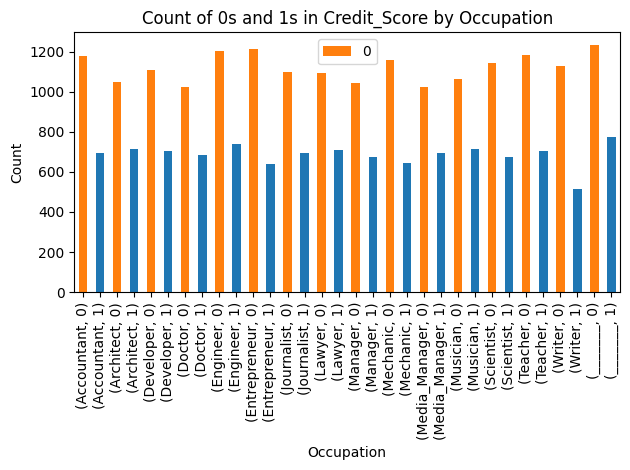

In [ ]:
# Graficar el conteo
colors = ['#FF7F0E', '#1F77B4']  # Cambia los colores según tus preferencias
conteo.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Credit_Score by Occupation')
plt.legend(['0', '1'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Se observa que el credit score no varia realmente según la ocupación de la persona. Si no que más bien es un valor que se distribuye uniforme. Luego, es necesaria su codificación a variable númerica, por lo que en ese caso lo más optimo al ser una variable no jerarquiza sería una codificación `One-Hot`, lo que aumentará la dimensionalidad de la base de datos. Por otro, lado si codificamos como variable categorica jerarquica ocupando `LabelEncoder` de sklearn, se podrian generar problemas para clasificadores como los arboles de decisión pudiendo tomar más importancia categorias cuyo número asignado fue más alto o más bajo.

Por todas estas razones, se toma la decisión de eliminar esta columna.

### Tratamiento de los datos

Se eliminan columnas irrelevantes para la tarea en especifico

In [ ]:
# Eliminar las columnas 'SSN', 'Name', 'Customer_ID' y 'Month'
columnas_eliminar = ['SSN', 'Name', 'Customer_ID', 'Month', 'ID','Occupation']
datos = datos.drop(columnas_eliminar, axis=1)

Se transforman columnas con valores anormales y valores outliers. Para los valores aoutliers se truncaron los valores por encima de cierto umbral.

Respecto a los valores anormales, se reemplazaron por el promedio de la columna omoda, según corresponda.

In [ ]:
# Calcular la moda de la columna 'Payment_Behaviour'
moda = datos['Payment_Behaviour'].mode()[0]

# Reemplazar los valores "!@9#%8" por la moda
datos['Payment_Behaviour'].replace('!@9#%8', moda, inplace=True)

# Reemplazar los valores -500 en la columna 'Age' por el promedio de los valores no negativos
age_mean = datos[datos['Age'] >= 0]['Age'].mean()
datos.loc[datos['Age'] == -500, 'Age'] = age_mean

# Aplicar valor absoluto en las columnas con valores negativos
columnas_negativas = ['Num_Bank_Accounts','Num_of_Delayed_Payment','Delay_from_due_date']
datos[columnas_negativas] = datos[columnas_negativas].abs()

# Reemplazar el valor -100 en la columna 'Num_of_Loan' por el promedio de los valores no negativos
num_loan_mean = datos[datos['Num_of_Loan'] >= 0]['Num_of_Loan'].mean()
datos.loc[datos['Num_of_Loan'] == -100, 'Num_of_Loan'] = num_loan_mean


# Establecer un valor fijo para los valores por encima del umbral en la columnas con outliers TRUNCAMIENTO
datos.loc[datos['Num_Credit_Card'] > 10, 'Num_Credit_Card'] = 10
datos.loc[datos['Interest_Rate'] > 40, 'Interest_Rate'] = 40
datos.loc[datos['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'] = 20

### Codificación variables categoricas

Columnas `Payment_Behaviour` y `Payment_of_Min_Amount` se convierten en números los valores únicos de ambas columnas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'Occupation'
datos['Payment_of_Min_Amount'] = label_encoder.fit_transform(datos['Payment_of_Min_Amount'])

# Obtener los números asignados a cada categoría
categorias = label_encoder.classes_
numeros_asignados = label_encoder.transform(categorias)

# Imprimir las categorías y sus números asignados
for categoria, numero in zip(categorias, numeros_asignados):
    print(f'Categoría: {categoria}, Número asignado: {numero}')

Categoría: NM, Número asignado: 0
Categoría: No, Número asignado: 1
Categoría: Yes, Número asignado: 2


In [ ]:
datos['Payment_Behaviour'] = label_encoder.fit_transform(datos['Payment_Behaviour'])

# Obtener los números asignados a cada categoría
categorias = label_encoder.classes_
numeros_asignados = label_encoder.transform(categorias)

# Imprimir las categorías y sus números asignados
for categoria, numero in zip(categorias, numeros_asignados):
    print(f'Categoría: {categoria}, Número asignado: {numero}')

Categoría: High_spent_Large_value_payments, Número asignado: 0
Categoría: High_spent_Medium_value_payments, Número asignado: 1
Categoría: High_spent_Small_value_payments, Número asignado: 2
Categoría: Low_spent_Large_value_payments, Número asignado: 3
Categoría: Low_spent_Medium_value_payments, Número asignado: 4
Categoría: Low_spent_Small_value_payments, Número asignado: 5


Normalización de las variables continuas en escala [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crea una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Selecciona las columnas numéricas que deseas normalizar
columnas_numericas = ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
                       'Delay_from_due_date', 'Changed_Credit_Limit',
                      'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Amount_invested_monthly',
                       'Monthly_Balance']

# Aplica la normalización a las columnas seleccionadas
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

### Información de los datos luego de los cambios

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28921 entries, 0 to 28920
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       28921 non-null  float64
 1   Annual_Income             28921 non-null  float64
 2   Monthly_Inhand_Salary     28921 non-null  float64
 3   Num_Bank_Accounts         28921 non-null  int64  
 4   Num_Credit_Card           28921 non-null  int64  
 5   Interest_Rate             28921 non-null  float64
 6   Num_of_Loan               28921 non-null  float64
 7   Delay_from_due_date       28921 non-null  float64
 8   Num_of_Delayed_Payment    28921 non-null  float64
 9   Changed_Credit_Limit      28921 non-null  float64
 10  Num_Credit_Inquiries      28921 non-null  float64
 11  Outstanding_Debt          28921 non-null  float64
 12  Credit_Utilization_Ratio  28921 non-null  float64
 13  Payment_of_Min_Amount     28921 non-null  int64  
 14  Amount

In [ ]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,28921.0,33.130227,10.693076,14.0,24.000000,33.000000,41.000000,99.0
Annual_Income,28921.0,0.006658,0.057974,0.0,0.000485,0.001252,0.002610,1.0
Monthly_Inhand_Salary,28921.0,0.254709,0.216702,0.0,0.084069,0.183912,0.363841,1.0
Num_Bank_Accounts,28921.0,16.622869,115.175918,0.0,3.000000,6.000000,8.000000,1794.0
Num_Credit_Card,28921.0,5.790498,2.315171,0.0,4.000000,6.000000,7.000000,10.0
Interest_Rate,28921.0,0.383158,0.263291,0.0,0.153846,0.358974,0.589744,1.0
Num_of_Loan,28921.0,3.864967,4.550477,0.0,2.000000,3.864967,6.000000,228.0
Delay_from_due_date,28921.0,0.337794,0.247285,0.0,0.149254,0.268657,0.462687,1.0
Num_of_Delayed_Payment,28921.0,31.534594,231.051538,0.0,8.000000,14.000000,19.000000,4360.0
Changed_Credit_Limit,28921.0,0.378204,0.157021,0.0,0.260757,0.354846,0.461466,1.0


In [ ]:
datos.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,0.000501,0.101382,3,4,0.051282,4.0,0.044776,7.0,0.419622,4.0,0.162020,0.196228,1,0.008042,2,1.0,1
1,23.0,0.000501,0.101382,3,4,0.051282,4.0,0.044776,8.0,0.419622,4.0,0.162020,0.044500,1,0.017834,5,1.0,1
2,28.0,0.001151,0.183089,2,4,0.128205,1.0,0.104478,1.0,0.328605,2.0,0.121012,0.611512,1,0.004039,0,1.0,1
3,28.0,0.001151,0.183089,2,4,0.128205,1.0,0.044776,1.0,0.304965,2.0,0.121012,0.484998,1,0.013012,5,1.0,1
4,28.0,0.001151,0.183089,2,4,0.128205,1.0,0.044776,0.0,0.281324,2.0,0.121012,0.428454,1,0.004348,0,1.0,1


### Matriz de correlación entre las variables

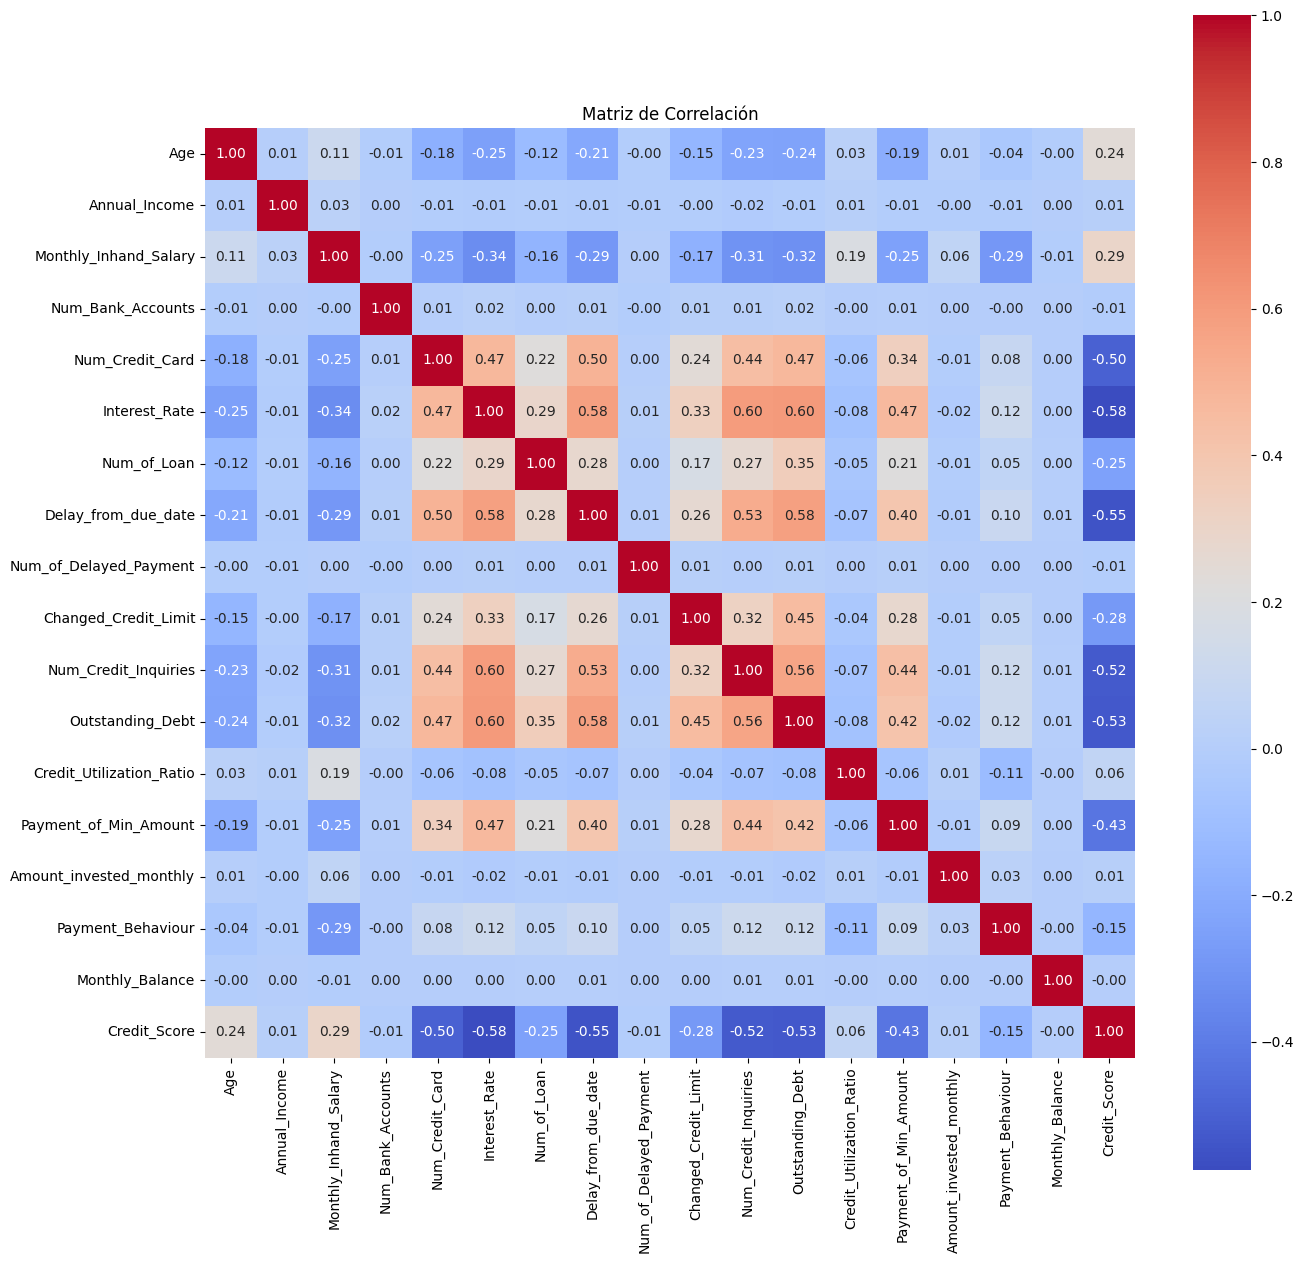

In [ ]:
# Calcula la matriz de correlación
correlaciones = datos.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', square=True,fmt='.2f')

# Configura las etiquetas de los ejes
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

# Modelos de clasificación

###Decision Trees

Importamos las librerias necesarias:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Definimos los valores de X e y que servirán para todos los clasificadores:

In [ ]:
X = datos.drop('Credit_Score', axis=1)  # Eliminar la columna de etiquetas
y = datos['Credit_Score']               # Tomar solo la columna de etiquetas

# Convertir los datos a matrices NumPy
X = np.array(X)
y = np.array(y)

# Verificar las dimensiones de las matrices
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (28921, 17)
Dimensiones de y: (28921,)


Aplicamos el clasificador:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

####Matriz de Confusión Clasificador Decision Trees

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

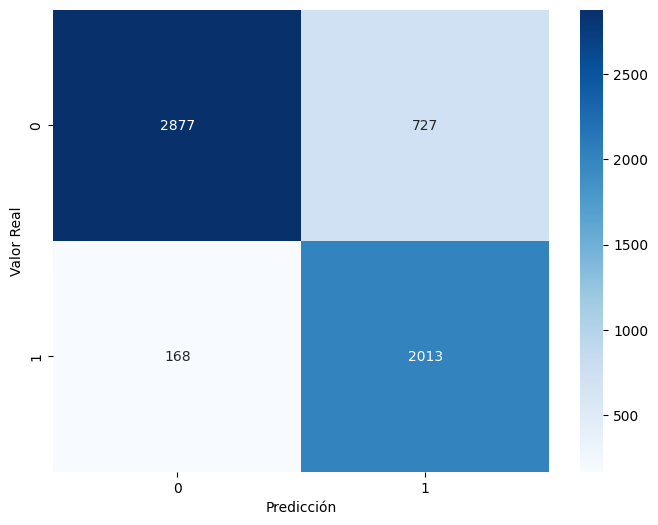

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Se puede apreciar que tiene una buena capacidad para predecir correctamente los verdaderos positivos (llamaremos verdaderos positivos a cuando el modelo predice 0 y es 0 realmente) la que es muy parecida a la capacidad para predecir los verdaderos negativos (predicción igual a 1 y real igual a 1), lo que significa que el modelo es mejor que el simple azar de lanzar una moneda.

###Support vector machine

Importamos las librerias:

In [ ]:
from sklearn.svm import SVC

Aplicamos el modelo:

In [ ]:
# Entrenar el modelo con los hiperparámetros
svm_model = SVC(C=1.0, kernel= 'rbf', gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

####Matriz de Confusión Clasificador SVM

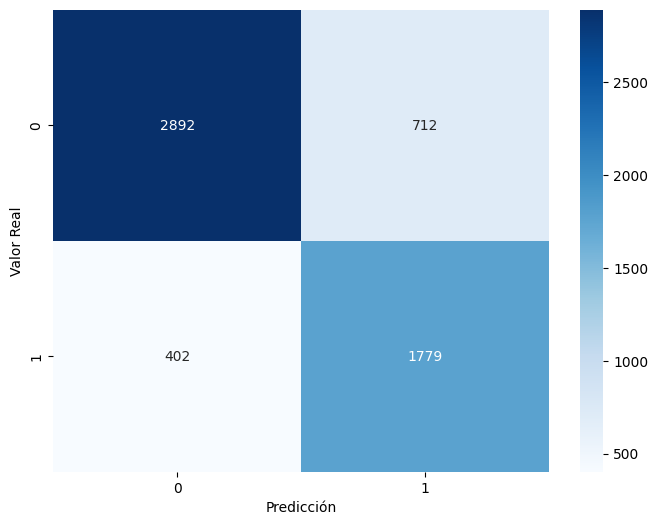

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Al analizar el clasificador SVM, podemos notar que muestra una habilidad buena para predecir correctamente los verdaderos positivos. Sin embargo, también se evidencian varias predicciones erróneas de falsos negativos.

###KNN

Importamos las librerias:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Entrenar el modelo con los hiperparámetros
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

####Matriz de confusión Clasificador KNN

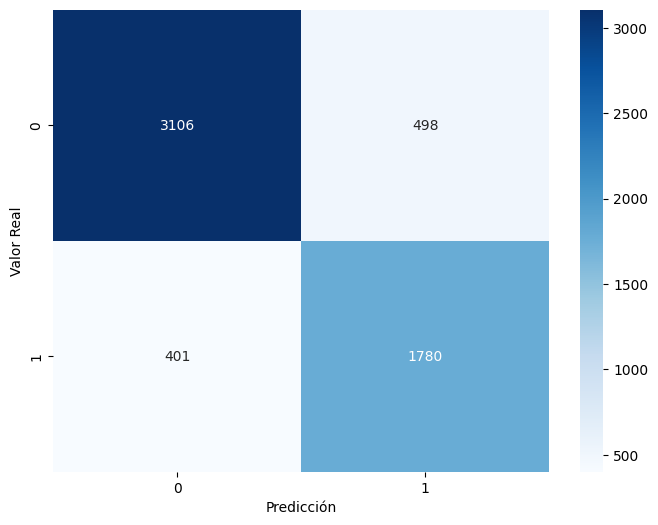

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Se puede apreciar que el clasificador KNN tiene una capacidad notable para predecir correctamente los verdaderos positivos y, en menor medida, los verdaderos negativos.

###Clasificador Gradient Boosting

Importamos librerias:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Entrenar el modelo con los hiperparámetros
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

####Matriz de Confusión del Clasificador Gradient Boosting

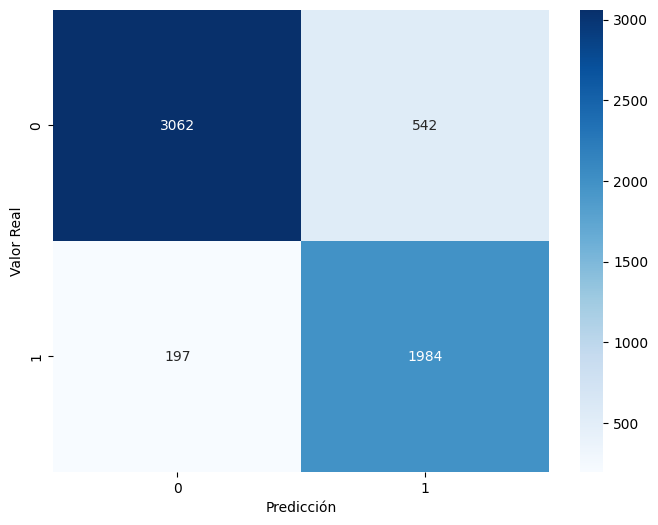

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Podemos observar que el clasificador de Gradient Boosting presenta una destacada capacidad para predecir correctamente tanto los verdaderos positivos como los verdaderos negativos.

###Clasificador Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model= RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

####Matriz de Confusión del Clasificador Random Forest

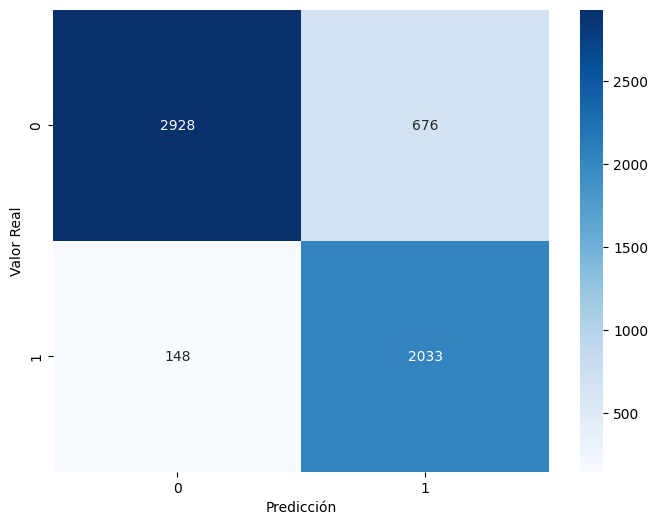

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Se puede observar que tiene una buena capacidad de predecir verdaderos positivos y verdaderos negativos en el conjunto de datos.

### Métricas de evaluación para cada modelo

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
models = [dt_model, svm_model, knn_model, rf_model, gb_model]
model_names = ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Gradient Boosting']

# Iterar sobre los modelos y mostrar las métricas
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print('Classification Report:')
    print(report)
    print('---')

Decision Tree:
Accuracy: 0.8453
ROC AUC: 0.8606
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      3604
           1       0.73      0.92      0.82      2181

    accuracy                           0.85      5785
   macro avg       0.84      0.86      0.84      5785
weighted avg       0.87      0.85      0.85      5785

---
SVM:
Accuracy: 0.8074
ROC AUC: 0.8091
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      3604
           1       0.71      0.82      0.76      2181

    accuracy                           0.81      5785
   macro avg       0.80      0.81      0.80      5785
weighted avg       0.82      0.81      0.81      5785

---
KNN:
Accuracy: 0.8446
ROC AUC: 0.8390
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3604
           1       0.78      0.82   

## Curvas ROC para cada modelo

Importamos algunas librerias:

In [ ]:
from sklearn.metrics import roc_curve, auc

Decision Tree: Accuracy = 0.8453, ROC AUC = 0.8606
[[2877  727]
 [ 168 2013]]
SVM: Accuracy = 0.8074, ROC AUC = 0.8091
[[2892  712]
 [ 402 1779]]
KNN: Accuracy = 0.8446, ROC AUC = 0.8390
[[3106  498]
 [ 401 1780]]
Random Forest: Accuracy = 0.8576, ROC AUC = 0.8723
[[2928  676]
 [ 148 2033]]
Gradient Boosting: Accuracy = 0.8723, ROC AUC = 0.8796
[[3062  542]
 [ 197 1984]]


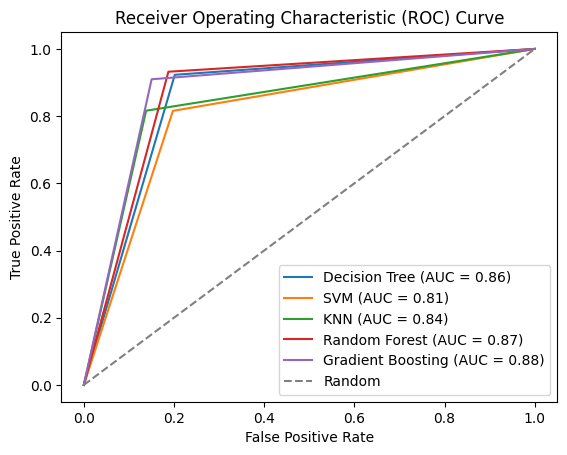

In [ ]:
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}')
    print(confusion_matrix(y_test, y_pred))

    # Calcular la curva ROC y dibujar el gráfico
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comparando las métricas y considerando que se busca el mejor modelo, podemos observar que el modelo con mejor desempeño general es el Gradient Boosting. Presenta la mayor exactitud (87.23%) y el mayor área bajo la curva ROC (88%). Además, tiene un buen balance entre precisión y recall para ambas clases, lo que indica una buena capacidad de clasificación.

En base a estos resultados, se puede concluir que el modelo Gradient Boosting, con los hiperparámetros específicos de "n_estimators"=100, learning_rate="0.1", "max_depth"=3 y "random_state"=42, es la mejor opción para abordar el problema de clasificación de calificación crediticia en este caso particular.

# Segmentación de los clientes del banco

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

## K-Means (Cluster particional)

Escogemos cantidad de clusters por medio del método del codo.


El diagrama del codo es una técnica utilizada para determinar el número óptimo de clusters en un conjunto de datos. Se traza la inercia en función del número de clusters, y se busca el punto en el gráfico donde la disminución de la inercia se hace menos significativa. Ese punto se asemeja a un "codo" en el gráfico, y representa un equilibrio entre la compacidad de los clusters y la simplicidad del modelo.

In [ ]:
# Variables para el clustering
variables = datos.drop(columns=["Credit_Score"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

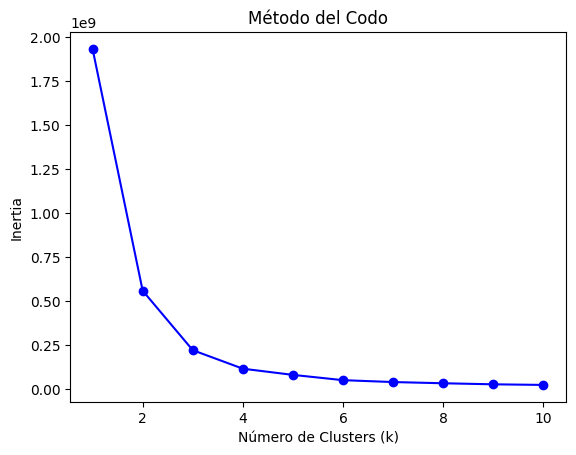

In [ ]:
# Rango de número de clusters a probar
k_values = range(1, 11)
inertia_values = []

# Aplicar K-means para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables)
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

Claramente la cantidad a escoger serán dos clusters.

El clustering particional es un enfoque donde los datos se agrupan en un número predefinido de clusters. Los algoritmos de clustering particional, como K-means, dividen los datos en grupos de manera iterativa, asignando cada punto al cluster más cercano en función de una medida de distancia. El objetivo es minimizar la suma de las distancias dentro de cada cluster y maximizar la distancia entre los clusters.
Para este caso se utilizaron las variables edad  y la deuda pendiente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


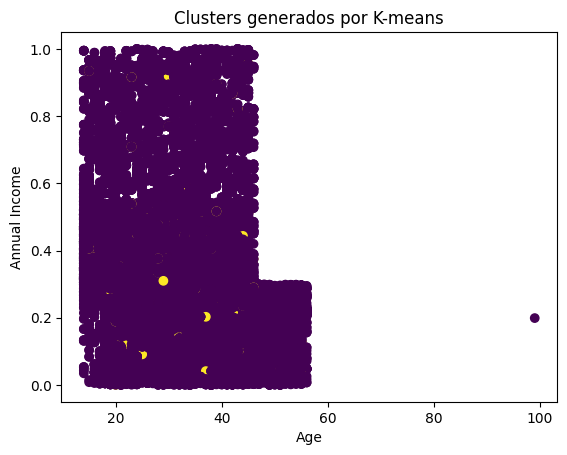

In [ ]:
# Aplicar K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=50)
kmeans_clusters = kmeans.fit(variables)

# Obtener las etiquetas de cluster asignadas a cada instancia
cluster_labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
datos['Cluster'] = cluster_labels

# Graficar los clusters
plt.scatter(datos['Age'], datos['Outstanding_Debt'], c=datos['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Clusters generados por K-means')
plt.show()

## Cluster aglomerativo

El clustering jerárquico organiza los datos en una estructura de árbol o dendrograma, donde los clusters se forman mediante la agrupación sucesiva de puntos de datos similares. Puede ser aglomerativo, comenzando con cada punto como un cluster separado y fusionándolos gradualmente, o divisivo, comenzando con un único cluster que se divide en subclusters más pequeños. Este enfoque permite explorar estructuras de clusters a diferentes niveles de detalle y no requiere un número predefinido de clusters.
En este caso también se usaron 2 clusters y para graficar la edad y el puntaje de crédito (Credit Score).

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Aplicar el clustering jerárquico
agglomerative = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
hierarchical_clusters = agglomerative.fit_predict(variables)

Dendograma

El dendrograma jerárquico es una representación gráfica que muestra la estructura de agrupamiento de los datos. Las ramas más largas indican mayor diferencia entre los clusters, y las ramas más cortas indican mayor similitud. Es útil para visualizar los clusters y comprender sus relaciones de similitud.

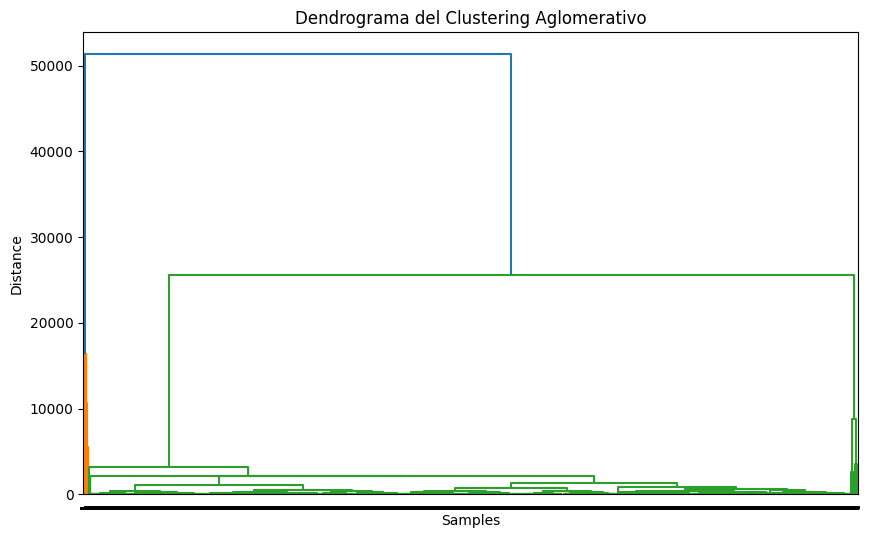

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular la matriz de enlace
linkage_matrix = linkage(variables, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=hierarchical_clusters)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrograma del Clustering Aglomerativo')
plt.show()

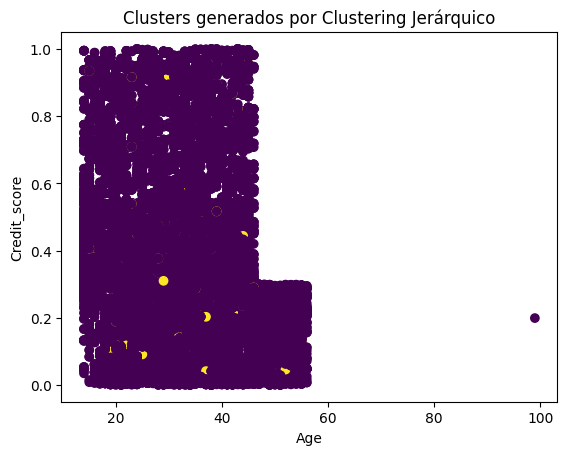

In [ ]:
# Graficar los clusters
plt.scatter(datos['Age'], datos['Outstanding_Debt'], c=hierarchical_clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Credit_score')
plt.title('Clusters generados por Clustering Jerárquico')
plt.show()

## Cluster basado en densidad

El clustering basado en densidad, como DBSCAN (Density-Based Spatial Clustering of Applications with Noise), agrupa los puntos de datos en función de la densidad de los mismos en el espacio. En lugar de depender de una distancia fija, este enfoque encuentra áreas densas de puntos y las considera clusters, separando las áreas menos densas. Permite detectar clusters de cualquier forma y puede manejar ruido y puntos atípicos de manera efectiva.

Metodo de la rodilla para encontrar el número óptimo de `eps` para Dbscan. Se busca el punto de inflexión en el gráfico donde la métrica de evaluación muestra un cambio significativo. Este punto indica el valor óptimo de eps para DBSCAN, que proporciona una buena separación de los clusters y una representación adecuada de la estructura de densidad de los datos.

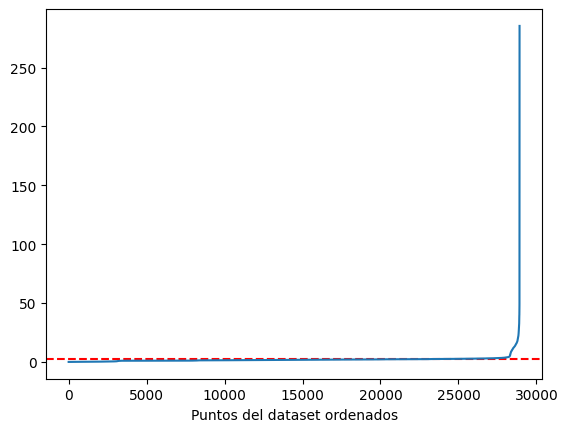

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

N = 5
nbrs = NearestNeighbors(n_neighbors=N).fit(variables)
distances, indices = nbrs.kneighbors(variables)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=2.5, color='r', linestyle='--') #Ajuste el valor para y
plt.xlabel('Puntos del dataset ordenados')
plt.plot(distances);

La rodilla esta en 2.5

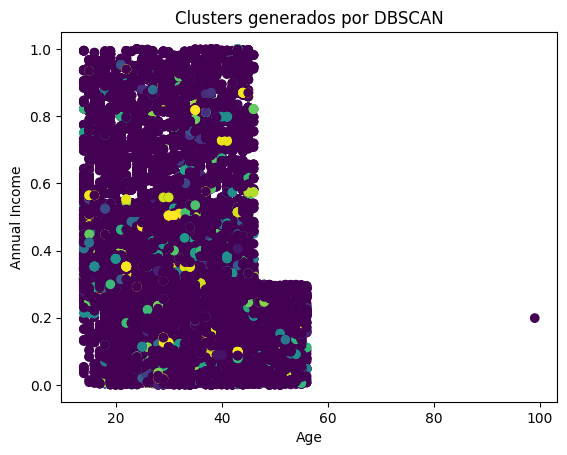

In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar el clustering basado en densidad (DBSCAN)
dbscan = DBSCAN(eps=2.5, min_samples=5)
density_clusters = dbscan.fit_predict(variables)

# Graficar los clusters
plt.scatter(datos['Age'], datos['Outstanding_Debt'], c=density_clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Clusters generados por DBSCAN')
plt.show()

Para graficar se utilizaron las variables Edad e Ingreso Anual.

Coeficientes de silhouette

El coeficiente de silueta (silhouette score) es una métrica utilizada para evaluar la calidad de los clusters en un conjunto de datos. Mide cuán bien se separan los puntos dentro de un cluster y cuánto se superponen con los puntos de otros clusters. El valor del coeficiente de silueta varía entre -1 y 1, donde un valor más cercano a 1 indica una mejor separación entre clusters. En resumen, el coeficiente de silueta ayuda a determinar qué tan bien definidos y distintos son los clusters en relación con los demás puntos de datos.

In [ ]:
from sklearn.metrics import silhouette_score

print("Silohuette K-Means\t", silhouette_score(X, kmeans.labels_))
print("Silhouette Ward Agg\t", silhouette_score(X, agglomerative.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster:
_filter_label = dbscan.labels_ >= 0
print("Silhouette DBSCAN\t", silhouette_score(X[_filter_label], dbscan.labels_[_filter_label]))

Silohuette K-Means	 0.9824440244564646
Silhouette Ward Agg	 0.9802458245039724
Silhouette DBSCAN	 -0.5517703500532782


Dataset con K-Means: El coeficiente de silueta obtenido es de 0.9824, lo cual indica una buena separación y cohesión de los clusters. Los datos dentro de cada cluster son similares entre sí y están bien separados de los datos de otros clusters.

Dataset con Ward Agg: El coeficiente de silueta obtenido es de 0.9802, también indicando una buena separación y cohesión de los clusters. Al igual que en el caso anterior, los datos dentro de cada cluster son similares entre sí y están bien separados de los datos de otros clusters.

Dataset con DBSCAN: El coeficiente de silueta obtenido es de -0.5517, lo cual indica una mala separación y cohesión de los clusters. Esto sugiere que los datos no se agrupan de manera clara y los clusters no son distintos ni bien definidos.

En base a estos resultados, se puede concluir que los algoritmos de K-Means y Ward Agg son más adecuados para el dataset, ya que obtienen coeficientes de silueta cercanos a 1, indicando una buena calidad de los clusters. Por otro lado, DBSCAN no es adecuado para este dataset, ya que presenta un coeficiente de silueta negativo, lo que implica una mala separación de los datos.

## Gráfico en dos dimensiones de cada cluster

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos mientras conserva la mayor cantidad posible de información. PCA transforma las variables originales en un conjunto de nuevas variables llamadas componentes principales, que son combinaciones lineales de las variables originales.

In [ ]:
from sklearn.decomposition import PCA
# Aplicar PCA para reducir las dimensiones a 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(variables)

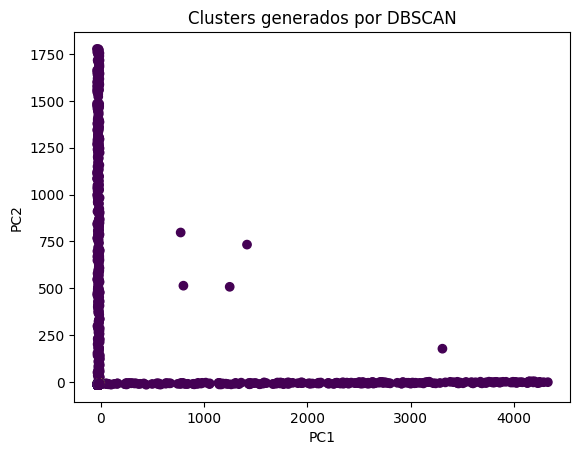

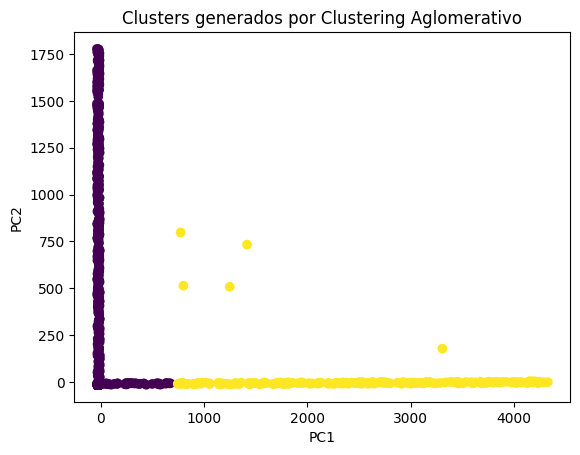

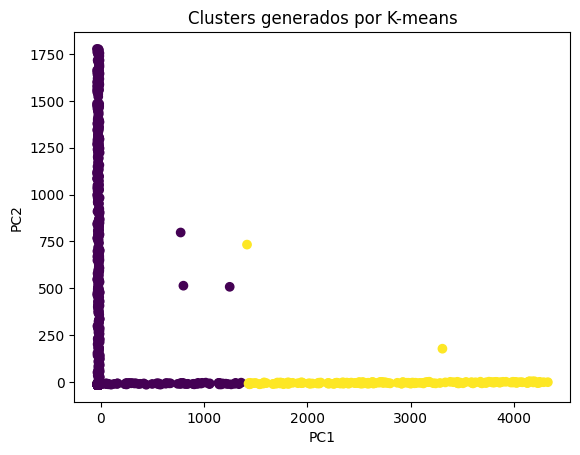

In [ ]:
# Graficar DBSCAN
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=density_clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters generados por DBSCAN')
plt.show()

# Graficar Clustering Aglomerativo
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters generados por Clustering Aglomerativo')
plt.show()

# Graficar K-means
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters generados por K-means')
plt.show()

In [ ]:
componentes_principales = pca.components_

# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Imprimir los coeficientes de carga y la varianza explicada
for i, (componente, varianza) in enumerate(zip(componentes_principales, varianza_explicada)):
    print(f"Componente Principal {i+1}:")
    print("Coeficientes de carga:", componente)
    print("Varianza explicada:", varianza)
    print()

Componente Principal 1:
Coeficientes de carga: [-2.17660251e-04 -1.67558846e-06  4.31668041e-07 -2.21102456e-03
  4.30856630e-05  1.60418032e-05  6.64649370e-05  8.95446482e-06
  9.99997526e-01  7.86457633e-06  5.97579028e-05  1.10881463e-05
  7.78787277e-07  3.30485051e-05  2.67034570e-06  8.04492046e-06
  3.36900404e-08]
Varianza explicada: 0.7990027182853016

Componente Principal 2:
Coeficientes de carga: [-6.38241786e-04  6.33996425e-07 -6.31939497e-06  9.99997241e-01
  1.22468983e-04  4.38110522e-05  1.48755250e-04  2.48674059e-05
  2.21084169e-03  1.73370336e-05  4.21854173e-04  3.41438602e-05
 -3.51111283e-06  5.34192559e-05  3.09481398e-06 -3.21481286e-05
  6.87395071e-08]
Varianza explicada: 0.19853913568622508




Basado en los resultados del análisis de componentes principales y considerando que los clusters son claramente separables en dos dimensiones, podemos hacer las siguientes observaciones:

El Componente Principal 1 explica la mayor parte de la varianza en los datos (79.90%), lo que indica que esta dimensión captura la mayor cantidad de información y es altamente relevante para la separación de los clusters.
El Componente Principal 2 explica una cantidad relativamente baja de varianza (19.85%) en comparación con el Componente Principal 1. Sin embargo, sigue contribuyendo con información adicional sobre las relaciones entre las variables y puede ser útil para una separación más precisa de los clusters.

En términos de separabilidad de los clusters, el hecho de que los datos sean claramente separables en dos dimensiones indica que existe una estructura subyacente en los datos que permite una agrupación efectiva. Esto es especialmente evidente al visualizar los clusters en un espacio bidimensional utilizando el análisis de componentes principales.

Sin embargo, cabe destacar que el método de clustering DBSCAN no pudo separar adecuadamente los clusters en los datos. Esto puede deberse a la naturaleza del algoritmo y su dependencia en la densidad de los puntos. Es posible que los clusters en los datos no cumplan con los requisitos de densidad necesarios para que DBSCAN funcione de manera óptima.